In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
df = pd.read_excel("/content/Online Retail (1).xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531283 entries, 0 to 531282
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531283 non-null  object        
 1   StockCode    531283 non-null  object        
 2   Description  530691 non-null  object        
 3   Quantity     531283 non-null  int64         
 4   InvoiceDate  531283 non-null  datetime64[ns]
 5   UnitPrice    531283 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531283 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.4+ MB


In [4]:
df.dropna(inplace =True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 531282
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [6]:
df["CustomerID"]=df["CustomerID"].astype(int)

In [7]:
df["InvoiceNo"] =df["InvoiceNo"].astype(int)

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom
1,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom
2,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom
3,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311,United Kingdom
4,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311,United Kingdom


In [10]:
df["month_year"] = df["InvoiceDate"].apply(lambda x: x.strftime('%Y-%m'))

In [11]:
df["month_year"].min()

'2010-12'

In [12]:
df["profit"] =df["UnitPrice"]*df["Quantity"]

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,profit
0,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom,2010-12,1.25
1,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,2010-12,0.85
2,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom,2010-12,2.55
3,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311,United Kingdom,2010-12,1.95
4,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311,United Kingdom,2010-12,2.95


In [14]:
df_trend =(df.groupby("month_year").sum()["profit"].reset_index()).sort_values(by =["profit"],ascending =False)
df_trend

,month_year,profit
11,2011-11,1161817.380
10,2011-10,1039318.790
9,2011-09,952838.382
5,2011-05,678594.560
6,2011-06,661213.690
8,2011-08,645343.900
7,2011-07,600091.011
3,2011-03,595500.760
0,2010-12,572713.890
1,2011-01,569445.040


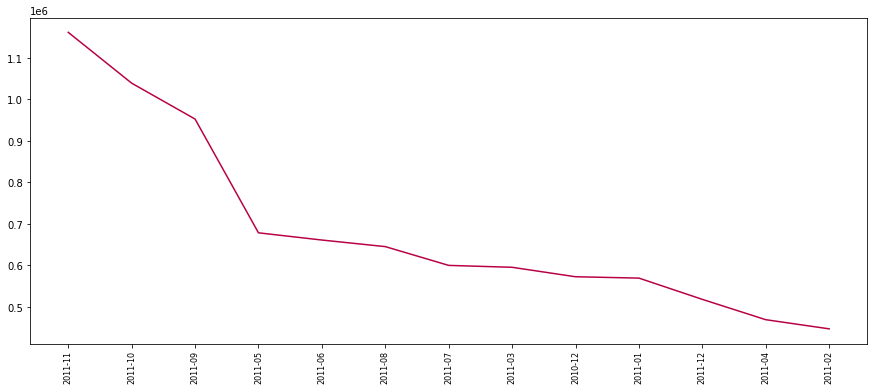

In [15]:
plt.figure(figsize=(15,6))
plt.plot(df_trend["month_year"], df_trend["profit"], color='#b80045')
plt.xticks(rotation ='vertical', size =8)
plt.show()

# We can see the monthly-yearly trend and November is the best month for the 13 months of data that we have

In [16]:
df.shape

(397924, 10)

In [17]:
# Our top customers 
df_customers=df.groupby("CustomerID").sum()["profit"].sort_values(ascending =False).head(10)


In [18]:
df_customers.head(10)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: profit, dtype: float64

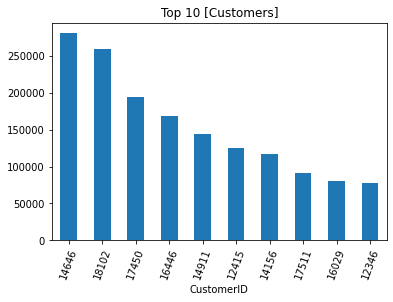

In [22]:
df_customers.plot.bar(x="CustomerID", y="profit", rot=70, title="Top 10 [Customers]");

plt.show();

In [145]:
# Top 6 Countries
df_countries =df.groupby("Country").sum()["profit"].sort_values(ascending =False)

In [146]:
top_6 = df_countries.head(6)

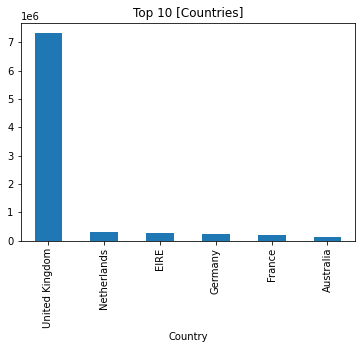

In [149]:
top_6.plot.bar(x="Country", y="profit",rot=70,  title="Top 10 [Countries]");

plt.show();

In [125]:
df["hour"] =df["InvoiceDate"].dt.hour
df["count"] =1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,profit,hour,count
0,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom,2010-12,1.25,9,1
1,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,2010-12,0.85,9,1
2,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom,2010-12,2.55,9,1
3,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311,United Kingdom,2010-12,1.95,9,1
4,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311,United Kingdom,2010-12,2.95,9,1


In [139]:
hours = [hour for hour, df in df.groupby(['hour'])]
hours

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

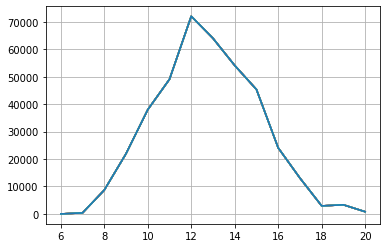

In [150]:
plt.plot(hours, df.groupby(['hour']).count())
plt.grid();



# The Conclusion, Summary and Findings of this Analysis is that, 12PM is their Peak Hour, United Kingdom is the country amongst their branches that makes the most Revenue, and the Customer with CustomerID 14646 is their best Customer as a matter of fact the TOP 10 Customers makes the most Revenue for this Online Retail Company